In [37]:
# Reference https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/sequential_model.ipynb#scrollTo=_3m_GnAGjFe1
from keras import models
from keras import layers
import tensorflow as tf

In [5]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(3,)))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


# A Sequential model is not appropriate when:

Your model has multiple inputs or multiple outputs
Any of your layers has multiple inputs or multiple outputs
You need to do layer sharing
You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [7]:
#Lets see why input_shape is important and what happens if you miss it 
model1 = models.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

In [8]:
model1.layers

In [12]:
model1.layers

In [11]:
model1.weights # This error is intentional 

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

 When you instantiate a Sequential model without an input shape, it isn't "built": it has no weights (and calling model.weights results in an error stating just this). 

# Understanding Param and input_shape

In [16]:
#model = models.Sequential()
#model.add(layers.Dense(32,activation='relu', input_shape=(3,)))


model2 = models.Sequential()
model2.add(layers.Dense(units=12, activation='relu', input_shape=(32,)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(units=8, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(units=6, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(units=1, activation='softmax'))

In [17]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                396       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

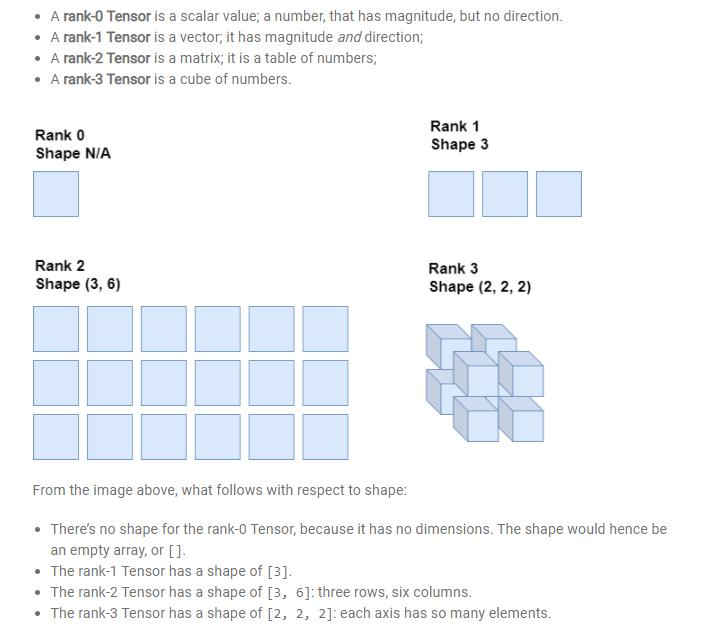

Source https://www.machinecurve.com/index.php/2020/04/05/how-to-find-the-value-for-keras-input_shape-input_dim/

This model consists of three hidden layers and an input layer. Dropout layers are added in between each pair of dense layers for regularisation. The Dropout layer takes and argument “rate”, which specifies the proportion of neurons in the preceding dense layer that should take a value of zero. In this model, the rate is set to 0.5, which means 50% of the neurons in the hidden layers are given a weight of 0.

- In Keras, the input dimension needs to be given excluding the batch-size (number of samples). In this neural network, the input shape is given as (32, ). 32 refers to the number of features in each input sample. Instead of not mentioning the batch-size, even a placeholder can be given. Another way to give the input dimension in the above model is (None, 32, ).

- If the data is multi-dimensional, like image data, then the input data must be given as (m, n) where m is the height-dimension and n is the width-dimension.

- Since 32 is the feature size, it is the column dimension of the input matrix. This means that the row dimension of the hidden layer is also 32.
 
- Now that we have the input game sorted, let us look at the model and understand its complexity. Here, by complexity we mean the number of trainable parameters (weight and bias parameters). Higher the number of trainable parameters, more the complexity of the model.

# The total number of trainable parameters = m x n + n 

The first dense/hidden layer has 12 neurons, which is its output dimension. This appears as the second output argument in the model summary, against the first hidden layer. The subsequent dropout layer does not alter the dimension of the output. It only alters the weights of the neurons. The second hidden layer has 8 output neurons, and the next one has 6. The final output layer has 1 neuron. Let us verify the total trainable parameters of this model.

- First hidden layer (m = 32, n = 12) : 32 x 12 + 12 = 396
- Second hidden layer (m = 12, n = 8) : 12 x 8 + 8 = 104
- Third hidden layer (m = 8, n = 6) : 8 x 6 + 6 =54
- Output layer (m = 6, n = 1) : 6 x 1 + 1 =7
- Total trainable parameters = 396 + 104 + 54 + 7 = 561

- Wonderful source for this worked example is from the link below -
https://towardsdatascience.com/ultimate-guide-to-input-shape-and-model-complexity-in-neural-networks-ae665c728f4b

# Try a simple dataset with Classification

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [48]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [49]:
X.shape

(768, 8)

In [43]:
# donot Run this cell 
# Note : Sometimes, though, you just have one dimension – which is the case with one-dimensional / flattened arrays, 
#for example. In this case, you can also simply use input_dim: specifying the number of elements within that first dimension only

# input_shape=(X.shape[1],)
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model = Sequential()
model.add(Dense(12, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 868us/step - loss: 9.3428 - accuracy: 0.3542
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 2.3258 - accuracy: 0.4505
Epoch 3/150
77/77 [==============================] - 0s 907us/step - loss: 1.4204 - accuracy: 0.4974
Epoch 4/150
77/77 [==============================] - 0s 816us/step - loss: 1.1288 - accuracy: 0.5169
Epoch 5/150
77/77 [==============================] - 0s 777us/step - loss: 0.9946 - accuracy: 0.6042
Epoch 6/150
77/77 [==============================] - 0s 751us/step - loss: 0.8749 - accuracy: 0.6289
Epoch 7/150
77/77 [==============================] - 0s 842us/step - loss: 0.8511 - accuracy: 0.6328
Epoch 8/150
77/77 [==============================] - 0s 764us/step - loss: 0.8239 - accuracy: 0.6458
Epoch 9/150
77/77 [==============================] - 0s 768us/step - loss: 0.7732 - accuracy: 0.6589
Epoch 10/150
77/77 [==============================] - 0s 764us/step - loss: 0.7259 - accuracy

77/77 [==============================] - 0s 773us/step - loss: 0.5243 - accuracy: 0.7487
Epoch 82/150
77/77 [==============================] - 0s 907us/step - loss: 0.5382 - accuracy: 0.7409
Epoch 83/150
77/77 [==============================] - 0s 881us/step - loss: 0.5290 - accuracy: 0.7409
Epoch 84/150
77/77 [==============================] - 0s 790us/step - loss: 0.5247 - accuracy: 0.7279
Epoch 85/150
77/77 [==============================] - 0s 803us/step - loss: 0.5247 - accuracy: 0.7292
Epoch 86/150
77/77 [==============================] - 0s 768us/step - loss: 0.5202 - accuracy: 0.7383
Epoch 87/150
77/77 [==============================] - 0s 763us/step - loss: 0.5198 - accuracy: 0.7526
Epoch 88/150
77/77 [==============================] - 0s 738us/step - loss: 0.5269 - accuracy: 0.7435
Epoch 89/150
77/77 [==============================] - 0s 764us/step - loss: 0.5239 - accuracy: 0.7474
Epoch 90/150
77/77 [==============================] - 0s 758us/step - loss: 0.5223 - accuracy: 

In [53]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7812
accuracy: 78.12%


# Try a simple dataset with Regression

In [32]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [33]:
train_data.shape

(404, 13)

In [34]:
test_data.shape

(102, 13)

# As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:

- Per capita crime rate.
- Proportion of residential land zoned for lots over 25,000 square feet.
- Proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- Average number of rooms per dwelling.
- Proportion of owner-occupied units built prior to 1940.
- Weighted distances to five Boston employment centres.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
% lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars(Label)

- Link https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [23]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [27]:
print(train_data.shape[1])

13


In [24]:
train_data.shape

(404, 13)

In [65]:

from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],))) # Note: print(train_data.shape[1]) is 13 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [71]:

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [72]:
np.mean(all_scores)

2.7524108290672302

In [76]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 0s/step - loss: 20.2172 - mae: 2.8213


In [77]:
test_mae_score

2.8212573528289795